In [16]:
#!pip install alice_ml 

In [ ]:
#!pip install mne

In [1]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew , variation
from scipy.signal import welch
import pandas as pd
from scipy.signal import hilbert
import glob
from mne.event import define_target_events
from alice_ml.features import get_features_from_mne
from alice_ml.models import predict_mne


In [2]:
%matplotlib qt

In [3]:
import os

In [18]:
os.chdir('D:/all_eeg/mu_eeg/chernovik_2/resample/resample MU 3-4 eyars mu1 and mu2 (all)/') 

In [19]:
filenames = glob.glob('*_mu_1.fif')
print(len(filenames))
filenames

1


['NP112201_mu_1.fif']

In [20]:
ID=filenames[0]#выираем файл, проверяем что m2 и m1 это один человек  
ID

'NP112201_mu_1.fif'

In [21]:
name_1 = ID 
E_1 = mne.io.read_raw_fif(name_1, preload = True)
E_1 = E_1.drop_channels(['Photo', 'micr'])  
E_1 = E_1.filter(1, 50, phase='zero-double')



Opening raw data file NP112201_mu_1.fif...
    Range : 0 ... 99799 =      0.000 ...   199.598 secs
Ready.
Reading 0 ... 99799  =      0.000 ...   199.598 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-12 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (3.302 s)



C:\Users\chuba\AppData\Local\Temp\ipykernel_11412\794682352.py:2: RuntimeWarning: This filename (NP112201_mu_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  E_1 = mne.io.read_raw_fif(name_1, preload = True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.1s finished


In [22]:
filenames = glob.glob('*_mu_2.fif')
print(len(filenames))
filenames

2


['NP112201_mu_2.fif', 'NP112211_mu_2.fif']

In [23]:
ID=filenames[0]#выираем файл, проверяем чтобы NP совпдала 
ID

'NP112201_mu_2.fif'

In [24]:
name_2 = ID #видео с руками перед 

E_2 = mne.io.read_raw_fif(name_2, preload = True)
E_2 = E_2.drop_channels(['Photo', 'micr'])  
E_2 = E_2.filter(1, 50, phase='zero-double')
#E_2 = E_2.copy().notch_filter(50, picks=None, filter_length='auto', 
                                #notch_widths=None, trans_bandwidth=1.0, n_jobs=None, method='fir', 
                                #iir_params=None, mt_bandwidth=None, p_value=0.05, phase='zero', 
                                #fir_window='hamming', fir_design='firwin', 
                                #pad='reflect_limited', 
                                #skip_by_annotation=('edge', 'bad_acq_skip'), verbose=None)



Opening raw data file NP112201_mu_2.fif...
    Range : 0 ... 91619 =      0.000 ...   183.238 secs
Ready.
Reading 0 ... 91619  =      0.000 ...   183.238 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-12 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (3.302 s)



C:\Users\chuba\AppData\Local\Temp\ipykernel_11412\137901154.py:3: RuntimeWarning: This filename (NP112201_mu_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  E_2 = mne.io.read_raw_fif(name_2, preload = True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.2s finished


In [25]:
#соединяем две записи 
E = E_1.copy()
E.append([E_2])

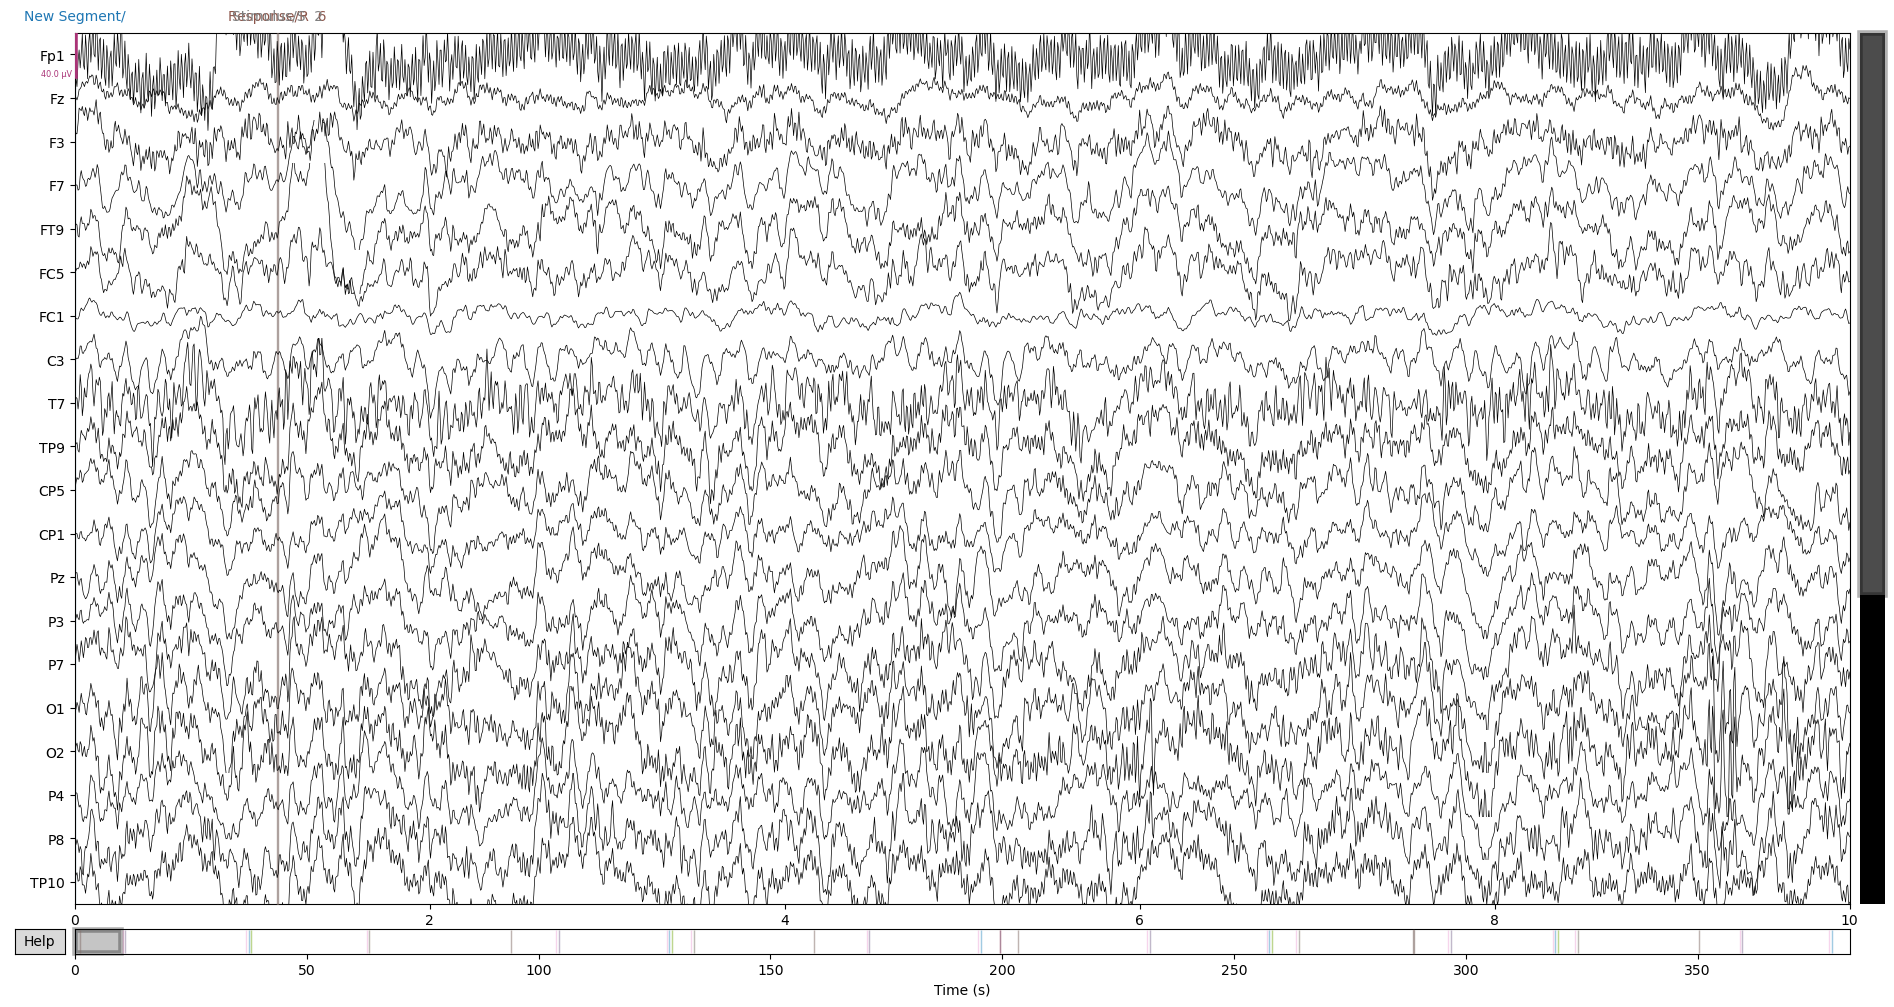

Channels marked as bad:
none


In [26]:
E.plot()

In [27]:
#НАЧИНАЕМ ПРЕДОБРАБОТКУ, смотрим каналы 
print(E.info['ch_names'])

['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2']


In [28]:
#удаляем плохие сегменты и плохие каналы 
fig = E.plot(n_channels=len(E.ch_names))
fig.fake_keypress('a')

Channels marked as bad:
none


In [29]:
#смотрим плохие каналы
print(ID)
print(E.info['bads'])

NP112201_mu_2.fif
[]


In [30]:
#интерполяиця плохих каналов 
E = E.interpolate_bads(reset_bads=True, method=dict(eeg='MNE'), verbose=True)#reset_bads значит что после интерполяция он обнулит список плохих каналов 

C:\Users\chuba\AppData\Local\Temp\ipykernel_11412\1837421145.py:2: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  E = E.interpolate_bads(reset_bads=True, method=dict(eeg='MNE'), verbose=True)#reset_bads значит что после интерполяция он обнулит список плохих каналов


In [31]:
#начинаем ica 
ica = ICA(n_components=20, random_state=97) # Создаем объект ICA. Первым аргументом данной фунции является число компонент, на которые хотим разложить наш сигнал
ica.fit(E, reject_by_annotation=True) # Даем алгоритму возможность отыскать значения весов для ICA.

Fitting ICA to data using 31 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 10.0s.


<ICA | raw data decomposition, method: fastica (fit in 40 iterations on 191420 samples), 20 ICA components (31 PCA components available), channel types: eeg, no sources marked for exclusion>

In [32]:
#подсказка от ALICE 
table = predict_mne(E, ica)
table['flag_brain'] = table['flag_brain'].round(6)
table


D:\programm\prog file\anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\programm\prog file\anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\programm\prog file\anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 1.0.2. This might lead to breaking c

flag_brain  flag_muscles  flag_eyes
ICA000    0.000000      0.004040   1.000000
ICA001    0.121828      0.016846   0.068776
ICA002    0.283288      0.025100   0.113706
ICA003    0.000000      0.003785   0.999754
ICA004    0.429932      0.014947   0.018464
ICA005    0.645665      0.052251   0.025595
ICA006    0.498479      0.022529   0.032950
ICA007    0.366105      0.015885   0.044285
ICA008    0.911251      0.013027   0.010896
ICA009    0.177851      0.087997   0.135754
ICA010    0.031675      0.107425   0.247469
ICA011    0.614832      0.019260   0.028604
ICA012    0.181936      0.033406   0.138294
ICA013    0.143865      0.696223   0.120416
ICA014    0.060654      0.122567   0.249971
ICA015    0.014551      0.180682   0.309555
ICA016    0.316101      0.028676   0.103212
ICA017    0.186098      0.063857   0.160796
ICA018    0.090876      0.855837   0.080940
ICA019    0.029062      0.907138   0.147440

In [33]:
ica.plot_components(picks=range(20), inst=E, title=ID)
ica.plot_sources(inst = E)
plt.show()
    

Creating RawArray with float64 data, n_channels=20, n_times=191420
    Range : 0 ... 191419 =      0.000 ...   382.838 secs
Ready.


In [34]:
ica

<ICA | raw data decomposition, method: fastica (fit in 40 iterations on 191420 samples), 20 ICA components (31 PCA components available), channel types: eeg, 5 sources marked for exclusion>

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 31 PCA components


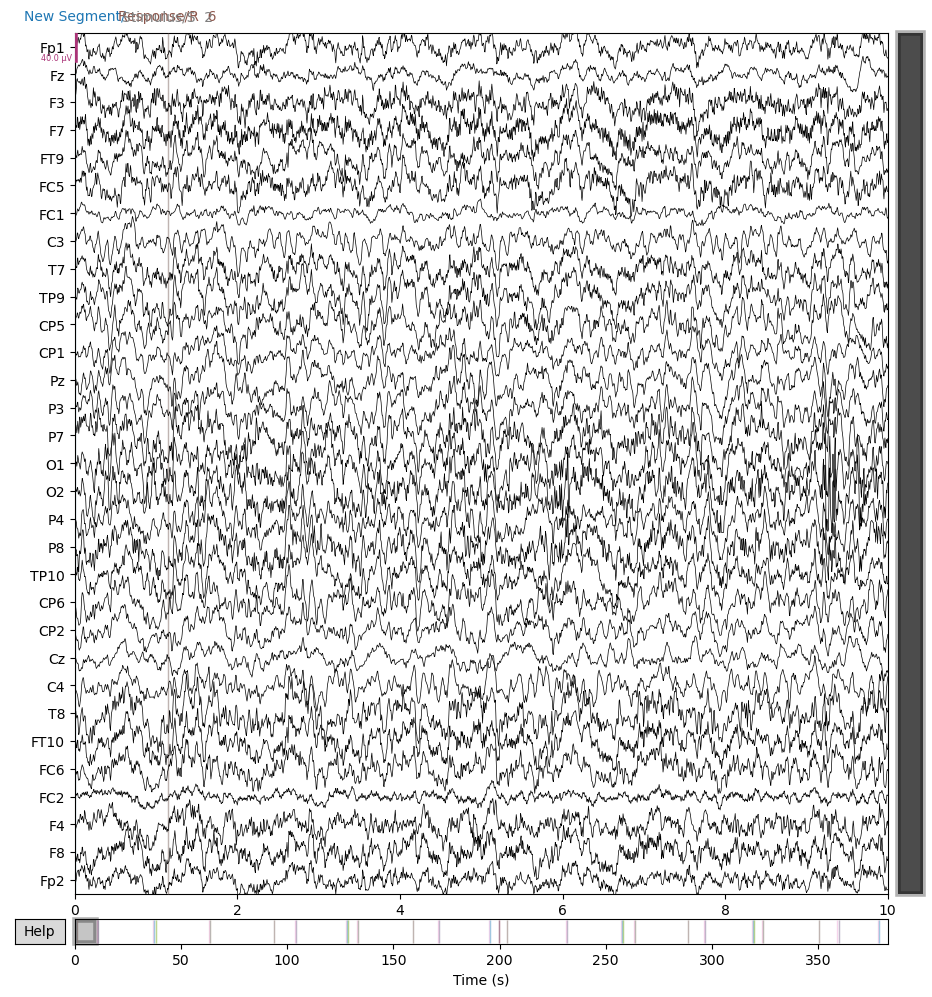

Channels marked as bad:
none


In [35]:
ica.exclude #Задаем этот список, как одно из полей класса
#raw_data_to_check=raw_data.copy()
ica.apply(E)
E.plot(start=0, n_channels=len(E.ch_names)) 

In [36]:
#ререференсинг 
E.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<Raw | NP112201_mu_1.fif, 31 x 191420 (382.8 s), ~45.3 MB, data loaded>

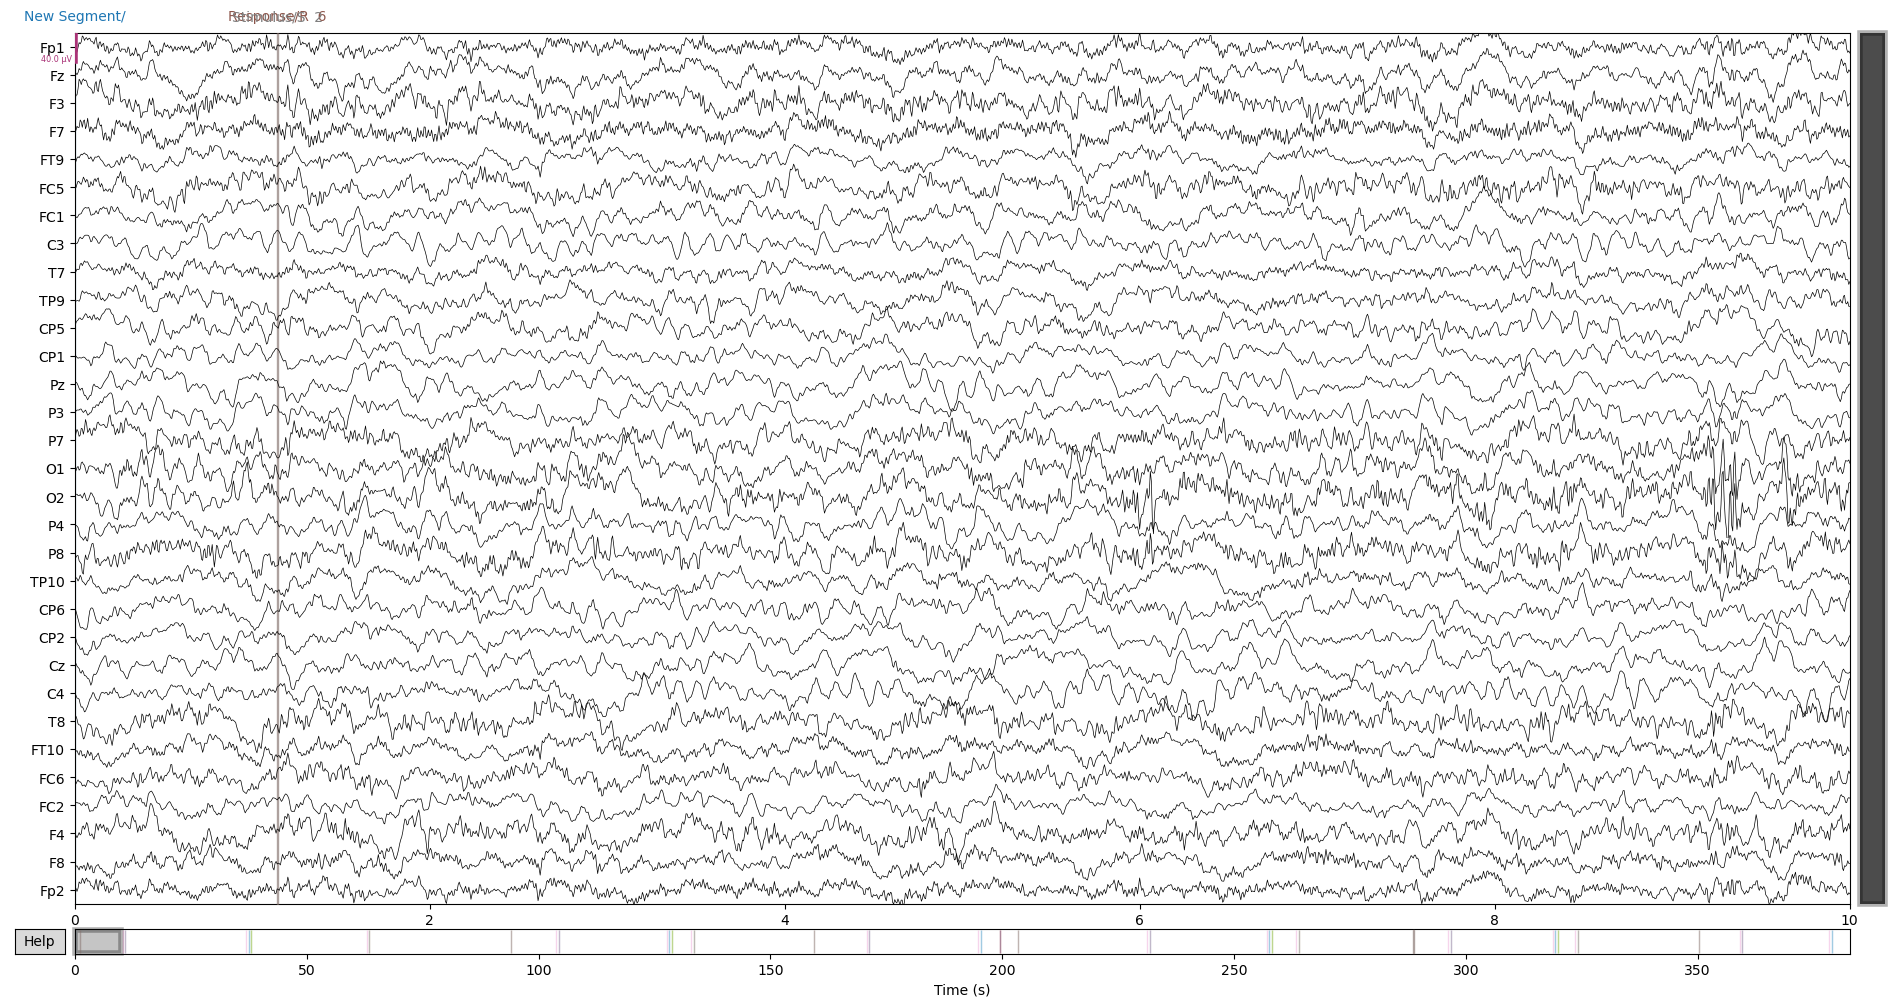

Channels marked as bad:
none


In [37]:
#смортим после ререференсинга 
E.plot(start=0, n_channels=len(E.ch_names)) 

In [38]:
#смотрим метки 
#s1 - старт рук и пробел 
#s2 - конец рук
#s3 - начало закрытых глаз 
#s4 - инструкция для рук 
#s5 - иснтрукцрия для глаз 
# после форматирование в fif (при даунсеплинге) метки начали считаться не с 0, а с 1 (соответсвенно New Segment - 1, Stimulus/S  1 - 2 и тд) )
events=mne.events_from_annotations(E) 

Used Annotations descriptions: ['New Segment/', 'Response/R  1', 'Response/R  2', 'Response/R  3', 'Response/R  6', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  8', 'Stimulus/S 12', 'Stimulus/S 14']


In [39]:
#рисуем метки 
fig=mne.viz.plot_events(events[0])
plt.show()

In [110]:
events[0]

array([[     0,      0,      1],
       [ 11344,      0,      5],
       [ 28269,      0,      2],
       [ 28527,      0,      2],
       [ 37242,      0,      2],
       [ 37494,      0,      3],
       [ 37752,      0,      6],
       [ 48818,      0,      2],
       [ 49069,      0,      4],
       [ 71836,      0,      5],
       [ 78718,      0,      2],
       [ 78969,      0,      2],
       [ 87786,      0,      2],
       [ 88044,      0,      3],
       [ 88303,      0,      6],
       [ 96094,      0,      2],
       [ 96353,      0,      4],
       [119120,      0,      5],
       [126706,      0,      2],
       [126961,      0,      2],
       [128786,      0,      2],
       [129045,      0,      3],
       [139000,      0,      1],
       [159064,      0,      5],
       [161501,      0,      2],
       [161756,      0,      2],
       [172449,      0,      2],
       [172706,      0,      3],
       [172964,      0,      6],
       [181353,      0,      2],
       [18

In [112]:
#проверяем что метки не сбились, должен вывыдить такую последовательность: 2,3,4,5,2,3,4,5,2,3 (в третьем столбце в выводе)
print(events[0][3])
print(events[0][5])

print(events[0][8])
print(events[0][9])

print(events[0][11])
print(events[0][13])

print(events[0][16])
print(events[0][17])

print(events[0][19])
print(events[0][21])

[28527     0     2]
[37494     0     3]
[49069     0     4]
[71836     0     5]
[78969     0     2]
[88044     0     3]
[96353     0     4]
[119120      0      5]
[126961      0      2]
[129045      0      3]


In [113]:
mu1_1=E.copy().crop(events[0][3][0]/500, events[0][5][0]/500) #делим на 500 посколько 1 нас в секунде 500 событ
ce1_1=E.copy().crop(events[0][8][0]/500, events[0][9][0]/500)
mu1_2=E.copy().crop(events[0][11][0]/500, events[0][13][0]/500)
ce1_2=E.copy().crop(events[0][16][0]/500, events[0][17][0]/500)
mu1_3=E.copy().crop(events[0][19][0]/500, events[0][21][0]/500)

In [114]:
#проверяем что метки не сбились, должен вывыдить такую последовательность: 2,3,4,5,2,3,4,5,2,3 (в третьем столбце)
print(events[0][25])
print(events[0][27])

print(events[0][30])
print(events[0][31])

print(events[0][33])
print(events[0][35])

print(events[0][38])
print(events[0][39])

print(events[0][41])
print(events[0][43])

[161756      0      2]
[172706      0      3]
[181606      0      4]
[204373      0      5]
[214673      0      2]
[223406      0      3]
[230906      0      4]
[253673      0      5]
[263073      0      2]
[271331      0      3]


In [115]:
mu2_1=E.copy().crop(events[0][25][0]/500, events[0][27][0]/500)
ce2_1=E.copy().crop(events[0][30][0]/500, events[0][31][0]/500)
mu2_2=E.copy().crop(events[0][33][0]/500, events[0][35][0]/500)
ce2_2=E.copy().crop(events[0][38][0]/500, events[0][39][0]/500)
mu2_3=E.copy().crop(events[0][41][0]/500, events[0][43][0]/500)

In [116]:
Mu=mu1_1.copy()
Mu.append([mu1_2, mu1_3, mu2_1, mu2_2, mu2_3])
Ce=ce1_1.copy()
Ce.append([ce1_2, ce2_1, ce2_2])

In [117]:
ID_MU = ID.rstrip('_mu2.fif')
print(ID_MU)

NP042303


In [118]:
#сохраняем записи НЕ ЭПОХИ 
folder = "D:/all_eeg/mu_eeg/chernovik_2/mu1_and_mu2_3-4_years_preprocecc/" #путь сохарнения 
Mu.save(folder + ID_MU + '_PCH.fif', overwrite=True)
Ce.save(folder + ID_MU + '_CE.fif', overwrite=True)

Writing D:\all_eeg\mu_eeg\chernovik_2\mu1_and_mu2_3-4_years_preprocecc\NP042303_PCH.fif
Closing D:\all_eeg\mu_eeg\chernovik_2\mu1_and_mu2_3-4_years_preprocecc\NP042303_PCH.fif
[done]
Writing D:\all_eeg\mu_eeg\chernovik_2\mu1_and_mu2_3-4_years_preprocecc\NP042303_CE.fif
Closing D:\all_eeg\mu_eeg\chernovik_2\mu1_and_mu2_3-4_years_preprocecc\NP042303_CE.fif
[done]


C:\Users\chuba\AppData\Local\Temp\ipykernel_17416\4250347033.py:3: RuntimeWarning: This filename (D:\all_eeg\mu_eeg\chernovik_2\mu1_and_mu2_3-4_years_preprocecc\NP042303_PCH.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  Mu.save(folder + ID_MU + '_PCH.fif', overwrite=True)
C:\Users\chuba\AppData\Local\Temp\ipykernel_17416\4250347033.py:4: RuntimeWarning: This filename (D:\all_eeg\mu_eeg\chernovik_2\mu1_and_mu2_3-4_years_preprocecc\NP042303_CE.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  Ce.save(folder + ID_MU + '_CE.fif', overwrite=True)


# ПРИСТУПАЕМ К РАБОТЕ С ЭПОХАМИ 

In [119]:
#формирование эпох по 2 секунды и удаление плохих эпох
threshold = 360e-6 #порого - отткуда велчина? (у Гургена 350e-6)
epochs_phc = mne.make_fixed_length_epochs(Mu, duration=2.0, preload=False, reject_by_annotation=True, proj=True, overlap=0.0, id=1, verbose=None)
data_phc = epochs_phc.drop_bad(reject=dict(eeg=threshold))

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1000 original time points ...
    Rejecting  epoch based on EEG : ['FT10']
    Rejecting  epoch based on EEG : ['FT10']
7 bad epochs dropped


C:\Users\chuba\AppData\Local\Temp\ipykernel_17416\2894730112.py:2: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  data_phc.plot(n_channels=len(data_phc.ch_names))


Using data from preloaded Raw for 20 events and 1000 original time points ...


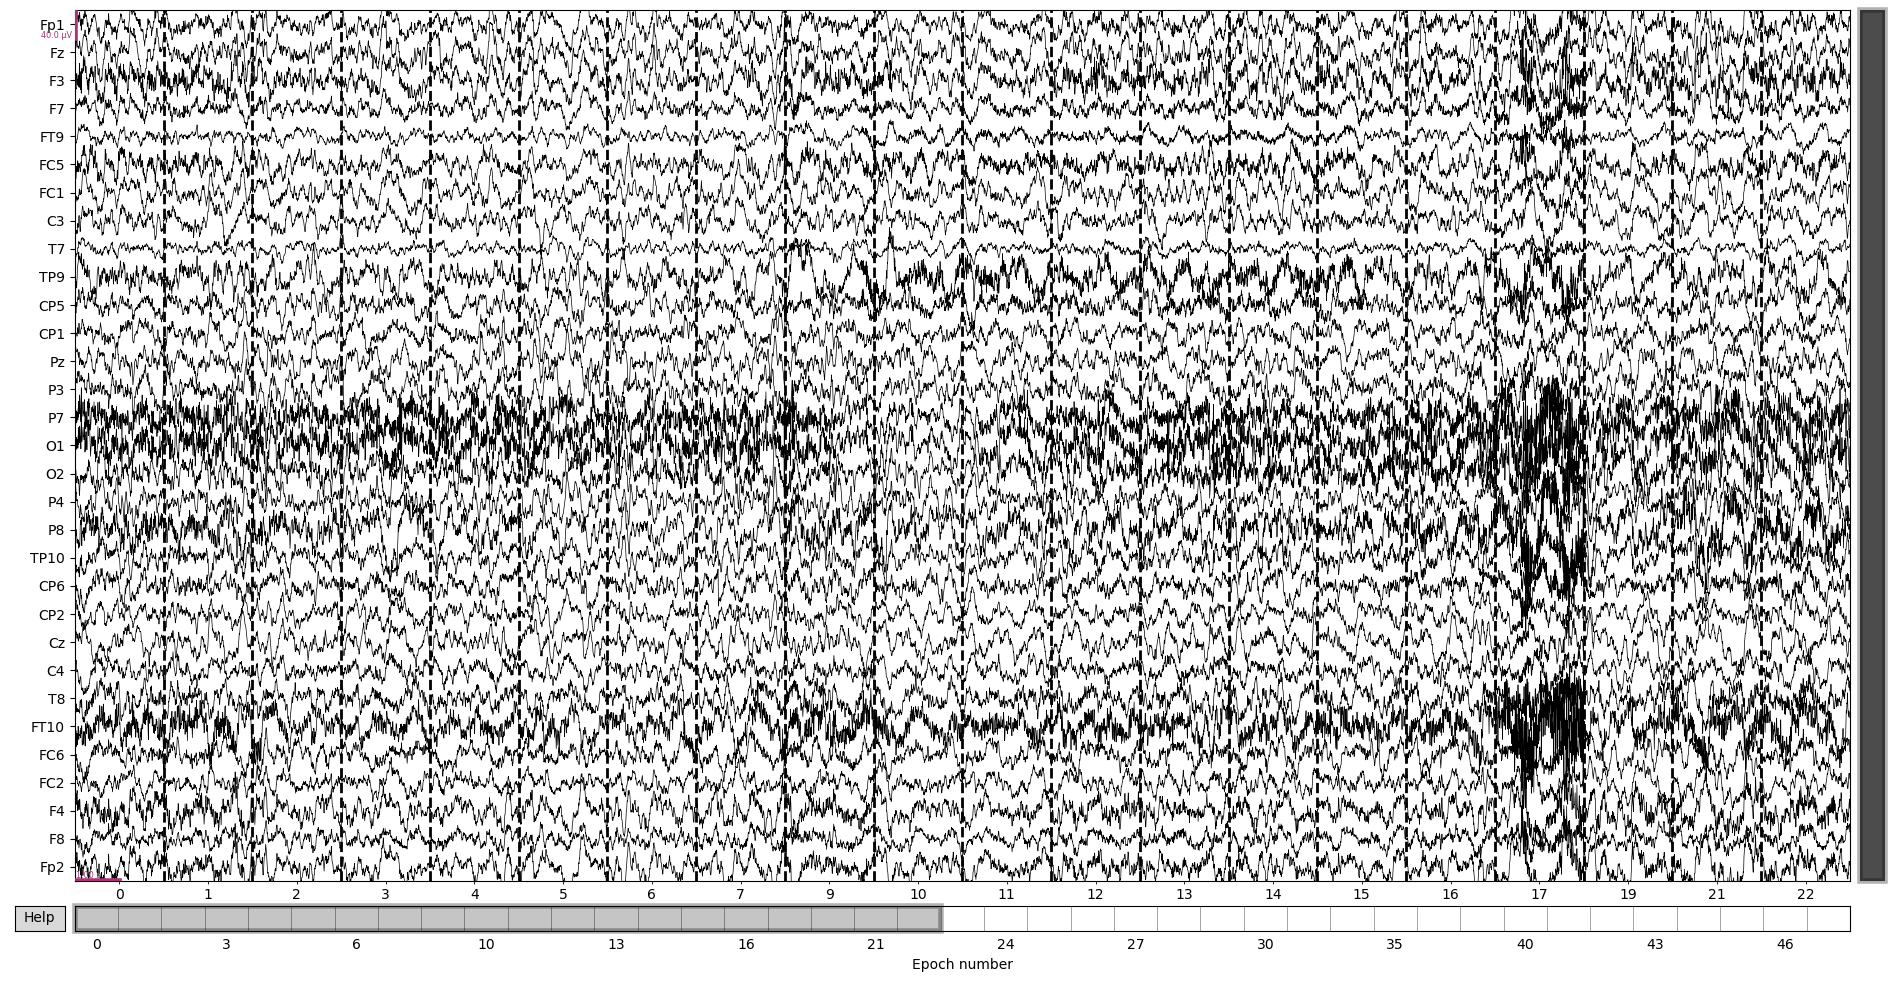

Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Dropped 0 epochs: 
The following epochs were marked as bad and a

In [121]:
#провереям результат 
data_phc.plot(n_channels=len(data_phc.ch_names))

In [122]:
#сохраняем запис ЭПОХИ 
folder = "D:/all_eeg/mu_eeg/chernovik_2/mu1_and_mu2_3-4_years_preprocecc/" #путь сохарнения 
data_phc.save(folder + ID_MU + '_PCH_epoch.fif', overwrite=True)

Using data from preloaded Raw for 1 events and 1000 original time points ...
Using data from preloaded Raw for 41 events and 1000 original time points ...


C:\Users\chuba\AppData\Local\Temp\ipykernel_17416\963463634.py:3: RuntimeWarning: This filename (D:/all_eeg/mu_eeg/chernovik_2/mu1_and_mu2_3-4_years_preprocecc/NP042303_PCH_epoch.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  data_phc.save(folder + ID_MU + '_PCH_epoch.fif', overwrite=True)


In [123]:
#сохранение фрагмента закратых глаз 
threshold = 360e-6 
epochs_Ce = mne.make_fixed_length_epochs(Ce, duration=2.0, preload=False, reject_by_annotation=True, proj=True, overlap=0.0, id=1, verbose=None)
data_Ce = epochs_Ce.drop_bad(reject=dict(eeg=threshold))

Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 91 events and 1000 original time points ...
    Rejecting  epoch based on EEG : ['FT10']
    Rejecting  epoch based on EEG : ['T8', 'FT10']
    Rejecting  epoch based on EEG : ['FT10']
    Rejecting  epoch based on EEG : ['FT10']
    Rejecting  epoch based on EEG : ['FT10']
8 bad epochs dropped


C:\Users\chuba\AppData\Local\Temp\ipykernel_17416\4177793272.py:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  data_Ce.plot(n_channels=len(data_Ce.ch_names))


Using data from preloaded Raw for 20 events and 1000 original time points ...


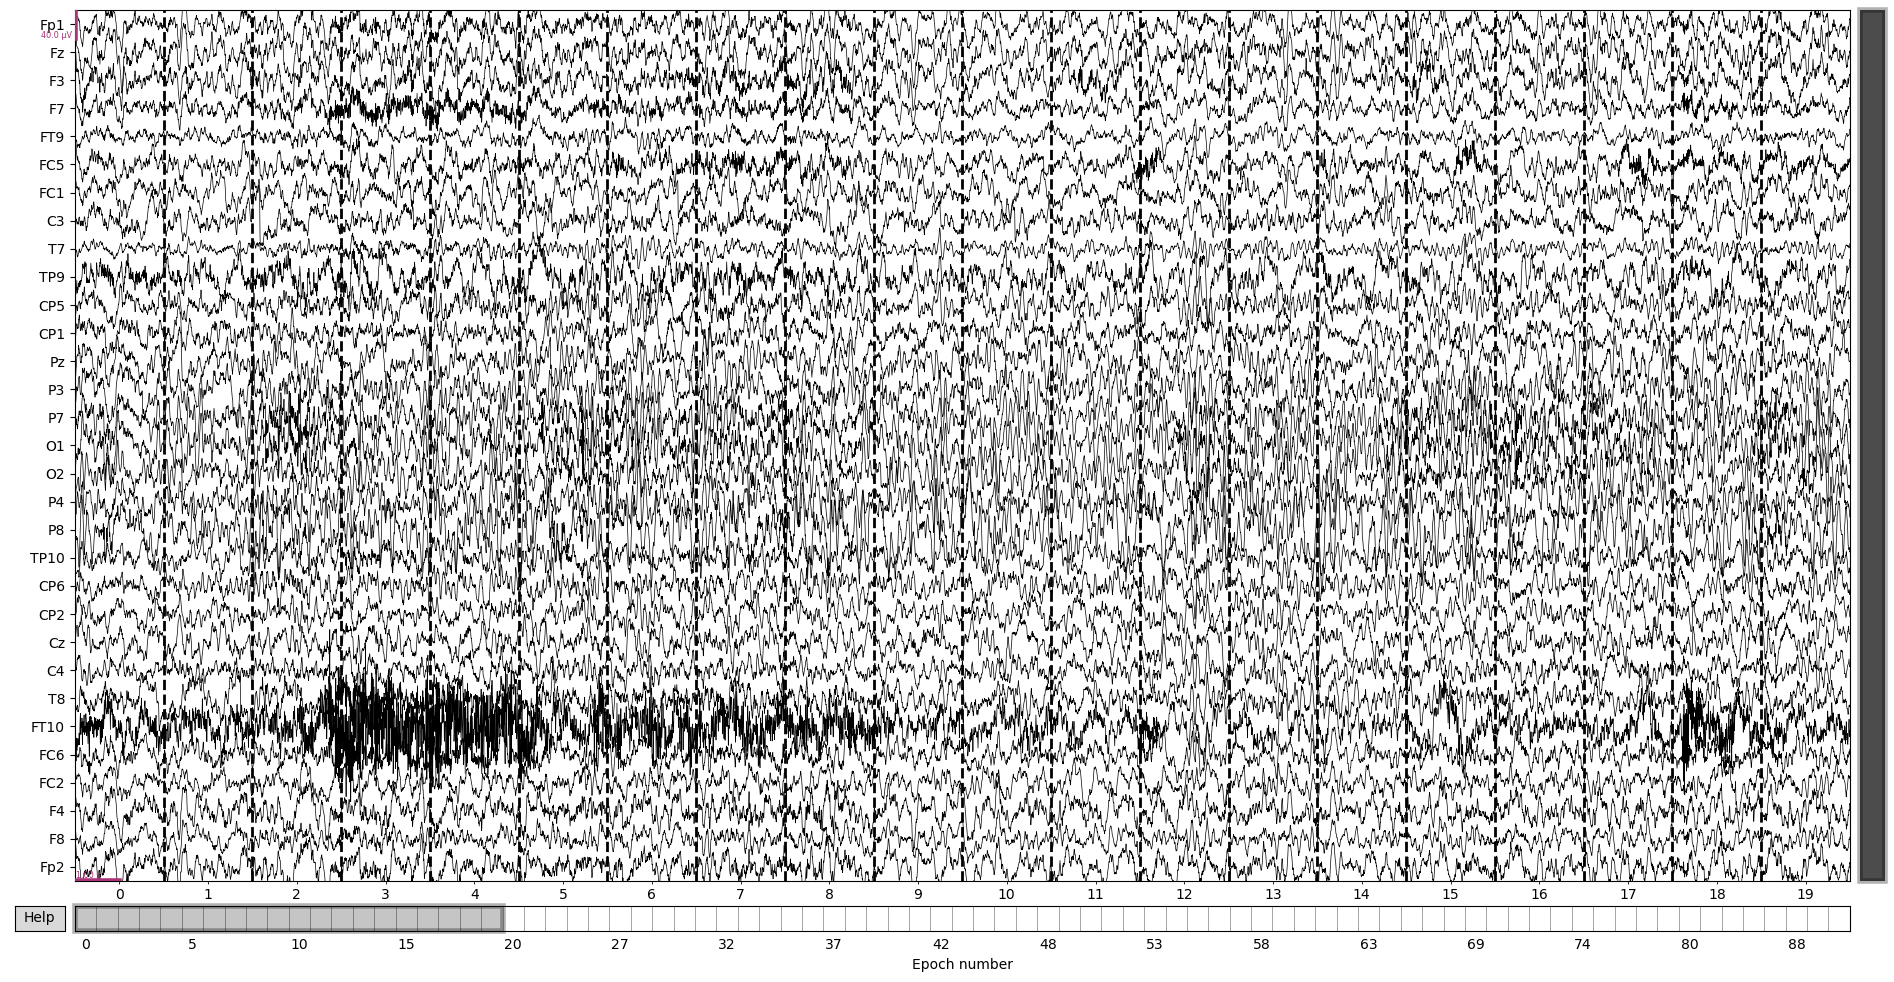

Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original time points ...
Using data from preloaded Raw for 20 events and 1000 original ti

In [124]:
data_Ce.plot(n_channels=len(data_Ce.ch_names))

In [125]:
#сохраняем закртые глаза как эпохи
folder = "D:/all_eeg/mu_eeg/chernovik_2/mu1_and_mu2_3-4_years_preprocecc/" #путь сохарнения 
data_Ce.save(folder + ID_MU + '_CE_epoch.fif', overwrite=True)

Using data from preloaded Raw for 1 events and 1000 original time points ...
Using data from preloaded Raw for 83 events and 1000 original time points ...


C:\Users\chuba\AppData\Local\Temp\ipykernel_17416\2048314853.py:3: RuntimeWarning: This filename (D:/all_eeg/mu_eeg/chernovik_2/mu1_and_mu2_3-4_years_preprocecc/NP042303_CE_epoch.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  data_Ce.save(folder + ID_MU + '_CE_epoch.fif', overwrite=True)
